In [1]:
from atmPy.aerosols.instruments.POPS import calibration
from atmPy.tools import plt_tools
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt_tools.setRcParams(plt)

# Generate a theoretical calibration

One can generate a calibration file based on the theoretical responds of the POPS instrument and a single point calibration.

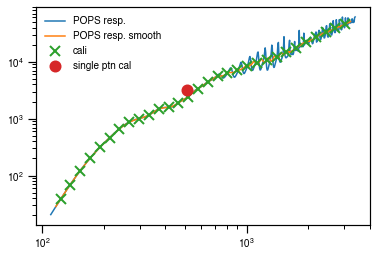

In [2]:
cali, a = calibration.generate_calibration(single_pnt_cali_d = 510,
                                             single_pnt_cali_ior = 1.6,
                                             single_pnt_cali_int = 10**3.508,
                                             ior = 1.5,
                                             dr=np.array([110, 3400]),
                                             no_pts = 600,
                                             no_cal_pts = 30,
                                             plot = True,
                                             raise_error = True,
                                             test = False
                                           )

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.lines.Line2D at 0x7ffb20d3e2e8>)

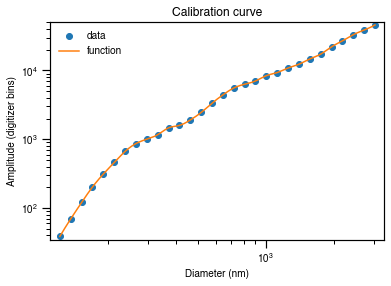

In [3]:
cali.plot_calibration()

# Generate an experimental calibration

This section shows how to read and save calibration data. In the process the data will be fit and a calibration function is created. Data and function can be plotted using the plot function mentioned below.

## read from string

create a string where each line consist of a diameter value (in nm) and an amplitude (in digitizer bin) seperated by space. <br> Note, in the example below the secend column is the $log_{10}(amplitude)$. The following cell does the convertion!

In [4]:
data = """130 1.73
140 1.85
150 1.99
173 2.28
200 2.53
233 2.77
270 2.96
315 3.04
365 3.165
420 3.213
490 3.355
570 3.56
660 3.72
770 3.795
890 3.86
1040 4.0
1200 4.05
1400 4.1
1600 4.18
1880 4.32
2180 4.44
2500 4.5"""

In [5]:
cal = calibration.read_str(data)

## Save the calibration from above

In [6]:
fname = './data/POPS_calibration.csv'
cal.save_csv(fname)

## read the file we just saved

In [7]:
out = calibration.read_csv(fname)

# plot the created calibration function and data

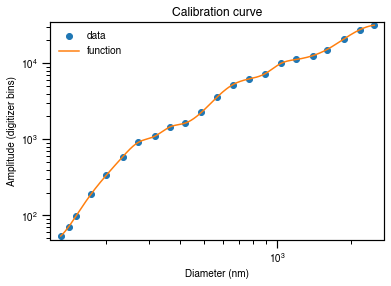

In [8]:
f,a,df,gf = cal.plot_calibration()

# Translate bins to diameters

This information is necessarey if data is provided prebinned e.g. when recorded through the serial interface.

In [9]:
out = calibration.get_interface_bins('/Users/htelg/data/POPS_calibrations/150529_MS1_DOS.csv', 16)

FileNotFoundError: [Errno 2] File b'/Users/htelg/data/POPS_calibrations/150529_MS1_DOS.csv' does not exist: b'/Users/htelg/data/POPS_calibrations/150529_MS1_DOS.csv'